In [50]:
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv("C:\\Users\\Michal\\Documents\\PythonScripts\\MAS\\KarateClub.csv", sep=';')

In [13]:
df

,F,T
0,2,1
1,3,1
2,3,2
3,4,1
4,4,2
...,...,...
73,34,29
74,34,30
75,34,31
76,34,32


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [2]:
def getAdjacencyMatrix(df):
    adjacencyMatrix = []
    for i in range(0,34):
        adjacencyMatrix.append([])
        for j in range(0,34):
            adjacencyMatrix[i].append(0)
    for i in range(0,len(adjacencyMatrix)):
        for j in range(0, len(adjacencyMatrix[i])):
            for n in df.iterrows():
                if n[1][0] == i + 1 or n[1][1] == i + 1:
                    if n[1][0] == j + 1 or n[1][1] == j + 1:
                        adjacencyMatrix[i][j] = 1
    return adjacencyMatrix

In [4]:
def printAdjacencyMatrix(adjacencyMatrix):
    for i in range(0,len(adjacencyMatrix)):
        print(adjacencyMatrix[i])

In [5]:
def getAdjacencyList(adjacencyMatrix):
    adjacencyList = {}
    for i in range(0,len(adjacencyMatrix)):
        adjacencyList[i + 1] = []
        for j in range(0, len(adjacencyMatrix[i])):
            if adjacencyMatrix[i][j] == 1 and i != j:
                adjacencyList[i + 1].append(j + 1)
    return adjacencyList

In [88]:
adjacencyList

{1: [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32],
 2: [1, 3, 4, 8, 14, 18, 20, 22, 31],
 3: [1, 2, 4, 8, 9, 10, 14, 28, 29, 33],
 4: [1, 2, 3, 8, 13, 14],
 5: [1, 7, 11],
 6: [1, 7, 11, 17],
 7: [1, 5, 6, 17],
 8: [1, 2, 3, 4],
 9: [1, 3, 31, 33, 34],
 10: [3, 34],
 11: [1, 5, 6],
 12: [1],
 13: [1, 4],
 14: [1, 2, 3, 4, 34],
 15: [33, 34],
 16: [33, 34],
 17: [6, 7],
 18: [1, 2],
 19: [33, 34],
 20: [1, 2, 34],
 21: [33, 34],
 22: [1, 2],
 23: [33, 34],
 24: [26, 28, 30, 33, 34],
 25: [26, 28, 32],
 26: [24, 25, 32],
 27: [30, 34],
 28: [3, 24, 25, 34],
 29: [3, 32, 34],
 30: [24, 27, 33, 34],
 31: [2, 9, 33, 34],
 32: [1, 25, 26, 29, 33, 34],
 33: [3, 9, 15, 16, 19, 21, 23, 24, 30, 31, 32, 34],
 34: [9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33]}

In [89]:
len(adjacencyList[1])

16

In [115]:
def getMin(adjacencyList):
    result = 999
    for key in adjacencyList.keys():
        if(len(adjacencyList[key]) < result):
            result = len(adjacencyList[key])
    return result

def getMax(adjacencyList):
    result = -1
    for key in adjacencyList.keys():
        if(len(adjacencyList[key]) > result):
            result = len(adjacencyList[key])
    return result

def getAvg(adjacencyList):
    result = 0
    totalSum = 0
    for key in adjacencyList.keys():
        totalSum += len(adjacencyList[key])
    return totalSum/len(adjacencyList.keys())

def getFrequency(adjacencyList):
    vFrequency = {}
    min = getMin(adjacencyList)
    max = getMax(adjacencyList)
    for i in range(min, max + 1):
        vFrequency[i] = 0
    for key in adjacencyList.keys():
        if len(adjacencyList[key]) not in vFrequency.keys():
            vFrequency[len(adjacencyList[key])] = 0
        vFrequency[len(adjacencyList[key])] += 1
    return vFrequency


def getRelativeFrequency(adjacencyList):
    vFrequency = {}
    for key in adjacencyList.keys():
        if len(adjacencyList[key]) not in vFrequency.keys():
            vFrequency[len(adjacencyList[key])] = 0
        vFrequency[len(adjacencyList[key])] += 1
    for key in vFrequency.keys():
        vFrequency[key] = float(vFrequency[key]/34)
    return vFrequency

In [116]:
print("Min: " + str(getMin(adjacencyList)))
print("Max: " + str(getMax(adjacencyList)))
print("Avg: " + str(getAvg(adjacencyList)))
print("Četnost: " + str(getFrequency(adjacencyList)))
print("Relativní četnost: " + str(getRelativeFrequency(adjacencyList)))

Min: 1
Max: 17
Avg: 4.588235294117647
Četnost: {1: 1, 2: 11, 3: 6, 4: 6, 5: 3, 6: 2, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 1, 13: 0, 14: 0, 15: 0, 16: 1, 17: 1}
Relativní četnost: {16: 0.029411764705882353, 9: 0.029411764705882353, 10: 0.029411764705882353, 6: 0.058823529411764705, 3: 0.17647058823529413, 4: 0.17647058823529413, 5: 0.08823529411764706, 2: 0.3235294117647059, 1: 0.029411764705882353, 12: 0.029411764705882353, 17: 0.029411764705882353}


<Axes: >

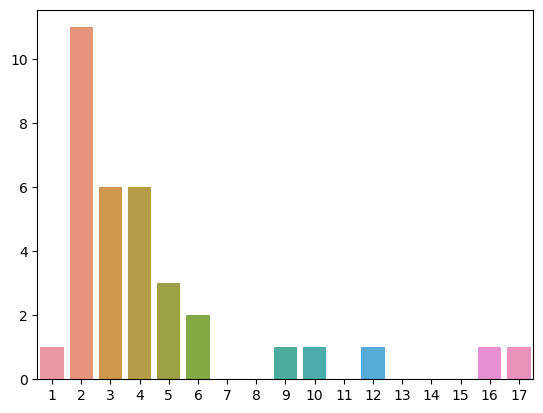

In [117]:
frequency = getFrequency(adjacencyList)
keys = list(frequency.keys())
vals = list(frequency.values())
sns.barplot(x=keys, y=vals)